# BREAST CANCER PREDICTION
## Using Principal Component Analysis (PCA)

In [1]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import Dataset
df = pd.read_csv('breast_cancer.csv')
## Show Data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
## Check Dataset Information
df.info()
## Result: no missing value expected, all values in float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
## Confirm No Missing Value
df.isna().sum()
## Result : confirmed

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

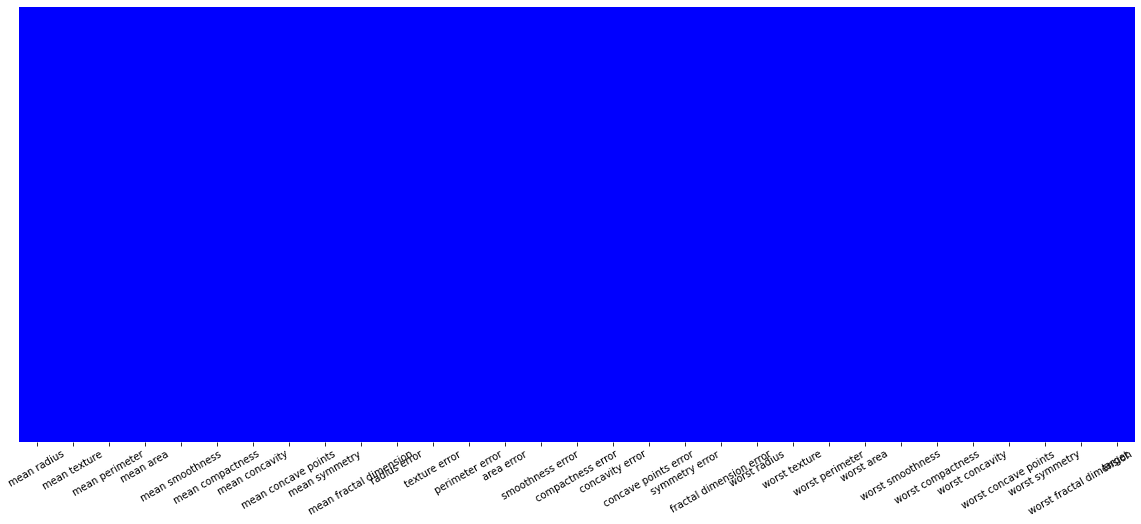

In [7]:
## Visualize Missing Value with Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isna(), cmap='winter', cbar=False, yticklabels=False)
plt.xticks(rotation=30)
plt.show()

In [5]:
## Describe Columns
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
## Check Proportion of Values in Target (in %)
(df['target'].value_counts()/len(df)*100).round(2)
## Result: Not imbalance

1.0    62.74
0.0    37.26
Name: target, dtype: float64

<hr>

## Machine Learning Modelling

In [12]:
## Import Package
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

### Splitting Data

In [13]:
## Define features and target
x = df.drop(columns='target')
y = df['target']

In [14]:
## Split Data
x_train, x_test, y_train, y_test = train_test_split(x , y, random_state=42, stratify=y, train_size=.80)

In [16]:
## Define shape of features
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


### Principal Component Analysis (PCA)

In [17]:
## Import package
from sklearn.decomposition import PCA

In [31]:
## Build and Fit & Transform Features
pca = PCA(n_components=2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)


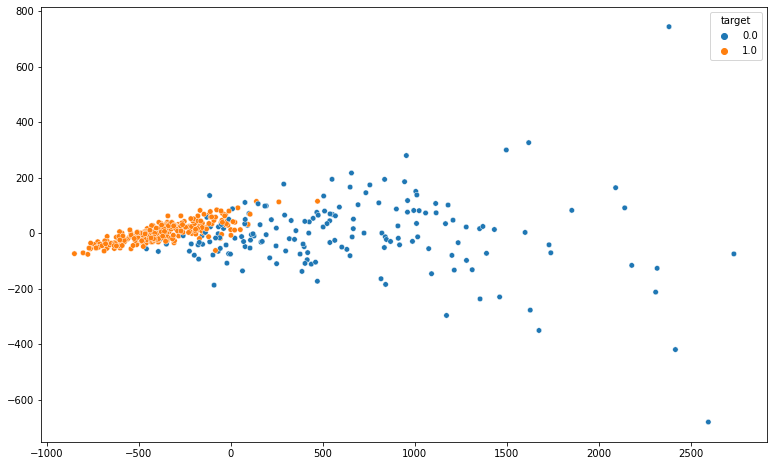

In [32]:
## Visualize
plt.figure(figsize=(13,8))
sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1], s=30, hue=y_train);

### Model Without PCA

In [37]:
## Import Package
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [38]:
## Create Function to perform Evaluation Matrix scoring for Model
def Eva_Matrix(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data={
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df=(pd.DataFrame(data,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df,cr_train,df_train,cr_test,df_test

#### SVM

In [39]:
## Run Function
df_SVM, cr_SVM_tr, cm_SVM_tr, cr_SVM_ts, cm_SVM_ts = Eva_Matrix(SVC(), x_train, x_test, y_train, y_test,'SVM Base')

In [40]:
df_SVM

,Accuracy,Recall,Precision,F1
SVM Base Training,0.9187,0.9789,0.9000,0.9378
SVM Base Testing,0.9298,0.9722,0.9211,0.9459


#### Decision Tree

In [42]:
## Run Function
df_DT, cr_DT_tr, cm_DT_tr, cr_DT_ts, cm_DT_ts = Eva_Matrix(DecisionTreeClassifier(), x_train, x_test, y_train, y_test,'Decision Tree Base')

In [43]:
df_DT

,Accuracy,Recall,Precision,F1
Decision Tree Base Training,1.0000,1.0000,1.0000,1.0000
Decision Tree Base Testing,0.9123,0.9028,0.9559,0.9286


#### Random Forest

In [44]:
## Run Function
df_RF, cr_RF_tr, cm_RF_tr, cr_RF_ts, cm_RF_ts = Eva_Matrix(RandomForestClassifier(), x_train, x_test, y_train, y_test,'Random Forest Base')

In [45]:
df_RF

,Accuracy,Recall,Precision,F1
Random Forest Base Training,1.0000,1.0000,1.0000,1.0000
Random Forest Base Testing,0.9474,0.9583,0.9583,0.9583


### Model With PCA

#### SVM

In [47]:
## Run Function
df_SVM_pca, cr_SVM_pca_tr, cm_SVM_pca_tr, cr_SVM_pca_ts, cm_SVM_pca_ts = Eva_Matrix(SVC(),
                                                                                    x_train_pca, x_test_pca,
                                                                                    y_train, y_test,
                                                                                    'SVM with PCA')

In [48]:
df_SVM_pca

,Accuracy,Recall,Precision,F1
SVM with PCA Training,0.9209,0.9684,0.9109,0.9388
SVM with PCA Testing,0.8860,0.9444,0.8831,0.9128


#### Decision Tree

In [55]:
## Run Function
df_DT_pca, cr_DT_pca_tr, cm_DT_pca_tr, cr_DT_pca_ts, cm_DT_pca_ts = Eva_Matrix(DecisionTreeClassifier(),
                                                                                x_train_pca, x_test_pca,
                                                                                y_train, y_test,
                                                                                'Decision Tree with PCA')

In [56]:
df_DT_pca

,Accuracy,Recall,Precision,F1
Decision Tree with PCA Training,1.0000,1.0000,1.0000,1.0000
Decision Tree with PCA Testing,0.7895,0.7083,0.9444,0.8095


#### Random Forest

In [59]:
## Run Function
df_RF_pca, cr_RF_pca_tr, cm_RF_pca_tr, cr_RF_pca_ts, cm_RF_pca_ts = Eva_Matrix(RandomForestClassifier(),
                                                                                x_train_pca, x_test_pca,
                                                                                y_train, y_test,
                                                                                'Random Forest with PCA')

In [60]:
df_RF_pca

,Accuracy,Recall,Precision,F1
Random Forest with PCA Training,1.0000,1.0000,1.0000,1.0000
Random Forest with PCA Testing,0.8246,0.7778,0.9333,0.8485


In [61]:
### Evaluation Matrix Summary
pd.concat([df_SVM, df_DT, df_RF, df_SVM_pca, df_DT_pca, df_RF_pca])

,Accuracy,Recall,Precision,F1
SVM Base Training,0.9187,0.9789,0.9000,0.9378
SVM Base Testing,0.9298,0.9722,0.9211,0.9459
Decision Tree Base Training,1.0000,1.0000,1.0000,1.0000
Decision Tree Base Testing,0.9123,0.9028,0.9559,0.9286
Random Forest Base Training,1.0000,1.0000,1.0000,1.0000
Random Forest Base Testing,0.9474,0.9583,0.9583,0.9583
SVM with PCA Training,0.9209,0.9684,0.9109,0.9388
SVM with PCA Testing,0.8860,0.9444,0.8831,0.9128
Decision Tree with PCA Training,1.0000,1.0000,1.0000,1.0000
Decision Tree with PCA Testing,0.7895,0.7083,0.9444,0.8095


<hr>

## Visualize Variance Ratio - Personal Notes

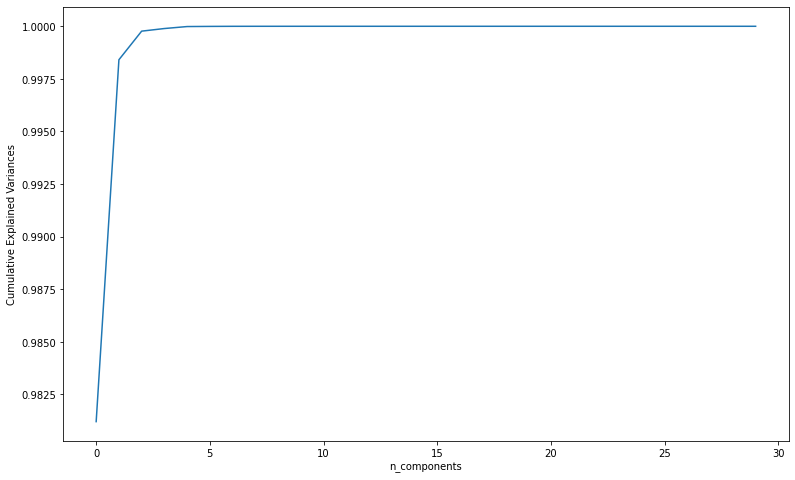

In [68]:
plt.figure(figsize=(13, 8))
plt.plot(np.cumsum(PCA().fit(x_train).explained_variance_ratio_))
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variances")
plt.show()

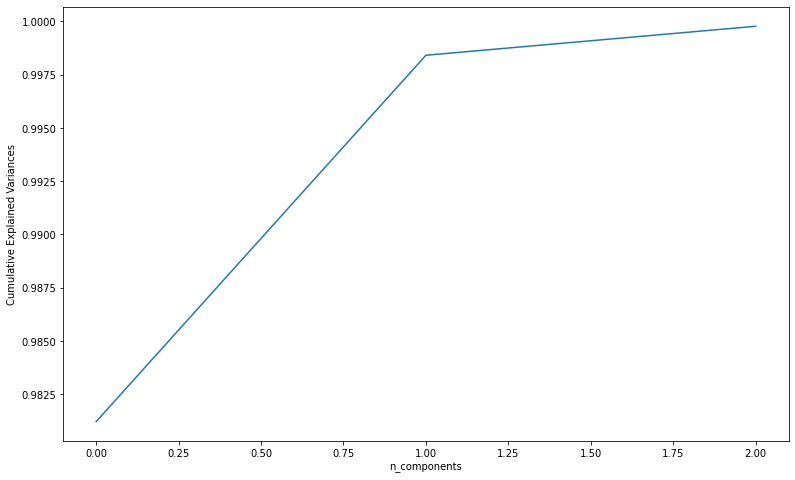

In [70]:
plt.figure(figsize=(13, 8))
plt.plot(np.cumsum(PCA(n_components=3).fit(x_train).explained_variance_ratio_))
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variances")
plt.show()

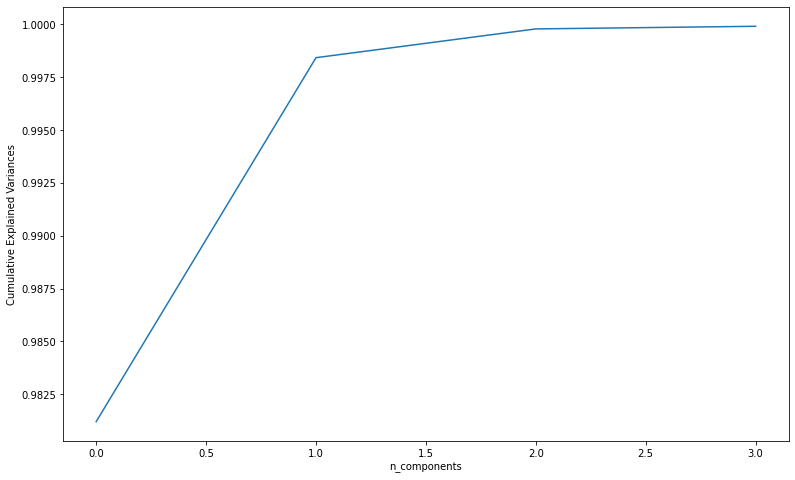

In [71]:
plt.figure(figsize=(13, 8))
plt.plot(np.cumsum(PCA(n_components=4).fit(x_train).explained_variance_ratio_))
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variances")
plt.show()